# **Tutorial 1 : A Simple Greenhouse Model**


**Week 1, Day 5, Climate Modeling**

**Content creators:** Jenna Pearson

**Content reviewers:** Dionessa Biton, Draco Xu, Will Gregory, Peter Ohue, Derick Temfack, Zahra Khodakaramimaghsoud, Peizhen Yang, Younkap Nina Duplex, Ohad Zivan, Chi Zhang

**Content editors:** Brodie Pearson, Abigail Bodner, Ohad Zivan, Chi Zhang

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS


# **Tutorial Objectives**

In this tutorial students will learn about the blackbody and greenhouse radiation models for energy emitted from Earth. 

By the end of this tutorial students will be able to:
* Understand what an emission temperature is, and how to find it given observed outgoing longwave radiation.
* Modify the blackbody radiation model to include the greenhouse effect.

# Setup

In [1]:
# imports
import xarray as xr                     # used to manipulate data and open datasets
import numpy as np                      # used for algebra and array operations
import matplotlib.pyplot as plt         # used for plotting

In [2]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

In [3]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

In [4]:
# @title Video 2: A Simple Greenhouse Model
#Tech team will add code to format and display the video

# Section 1 : A Radiating Earth

## Section 1.1 Planck's Law

All objects with a temperature emit **[electromagnetic radiation](https://www.weather.gov/jetstream/electro)**. This energy travels through space in the form of waves. In the lecture we discussed that blackbody radiation is a model of how Earth loses radiative energy to space. Although this is not a perfect model for Earth, we will use it as a basis to understand Earth's energy balance throughout tutorials 1-4. If we suppose Earth behaves as a perfect blackbody, then it emits energy at all wavelengths according to [Planck's Law](https://glossary.ametsoc.org/wiki/Planck%27s_radiation_law):

\begin{align}
    B(\lambda,T) = \frac{2 h c^2}{\lambda^5}\frac{1}{e^{hc/(\kappa T)}-1}
\end{align}

where $h =  6.626075 \times 10^{-34} J s$ is Planck's constant, $c= 2.99792 \times 108 m s^{-1}$ is the speed of light, and $\kappa = 1.3804 \times 10^{23} W K^{-1}$ is Boltzmann's constant. 

### Interactive Demo 1.1

This interactive demo will allow you to visualize how to blackbody curve changes as Earth warms and cools relative to it's current surface temperature of about 288K. Use the slide bar to adjust the emission temperature. Give the code  few seconds to replot before choosing a new temperature.

No need to worry about understanding the code here - this is conceptual. 

In [7]:
# @markdown Make sure you execute this cell to enable the widget!
# ohad comment: the graph appears cut at the end. it's a cool graph though. 
# a short googling didn't find a solution to this issue. I could change it to bokeh, which seems to be working well. 
# that is a widget that just plots the data, no calcaulting. and all of the code is in the backend. 

out = widgets.Output(layout=widgets.Layout(height='300px'))

# define constants used in Planck's Law
h = 6.626075e-34    # J s
c = 2.99792e+8      # m s^-1
k = 1.3804e-23      # W K^-1

# define the function for Planck's Law depedent on wavelength (lambda) and temeprature (T)
def planck(wavelength, temperature):
    a = 2.0*h*c**2
    b = h*c/(wavelength*k*temperature)
    intensity = a/ ( (wavelength**5) * (np.exp(b) - 1.0) )

    lpeak = (2.898 * 1e-3)/temperature

    return intensity,lpeak

# generate x-axis in increments from 1um to 100 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-6, 50e-6, 1e-9) 

def update_plot(change):
    with out:

      # get the blackbody curve and peak emission wavelength for 288 K
      intensity288, lpeak288 = planck(wavelengths, 288)

      # get the blackbody curve and peak emission wavelength for selected temperature
      intensity, lpeak = planck(wavelengths, w.value)

      # get the intensity at peak wavelength to limit the lines
      Ipeak,_ = planck(lpeak,w.value)
      Ipeak288,_ = planck(lpeak288,288)

      # add in wiens law
      plt.vlines(x=lpeak*1e6,ymin = 0,ymax = Ipeak, color= '#FF7676', ls = '--')
      plt.vlines(x=lpeak288*1e6,ymin = 0,ymax = Ipeak288, color= '#008CBF', ls = '--')

      # plot intensity curves
      plt.plot(wavelengths*1e6, intensity, lw = 3, label = 'T=' + str(w.value) + 'K', color= '#FF7676') 
      plt.plot(wavelengths*1e6, intensity288, lw = 3, label = 'T=288K', color= '#008CBF') 

      plt.xlabel('Wavelength ($\mu m$)')
      plt.ylabel('$B_\lambda(\lambda,T)$ $(W/(m^3 steradian)$')
      plt.ylim(0,1.0e7)
      plt.xticks(fontsize = 16)
      plt.yticks(fontsize = 16)

      # plt.title ('Spectral Radiance for T = ' + str(w.value) + ' K',y=1.08)
      plt.title('Spectral Radiance', y = 1.08)
      plt.legend()
      out.clear_output(wait=True) 
      plt.show()



w = widgets.IntSlider(min=250, max=300, step=5, value = 288,description="Emission Temperature", layout=widgets.Layout(width='500px',height = '100px'),
                      style = {'description_width': 'initial', 'handle_color':'lightblue','font_weight': 'bold'})

update_plot([])
w.observe(update_plot)
display(w, out)

IntSlider(value=288, description='Emission Temperature', layout=Layout(height='100px', width='500px'), max=300…

Output(layout=Layout(height='300px'))

### Questions 1.1

1. Recall from Tutorial 1 on Week 1 Day 3 the **electromagnetic spectrum** (shown below), which displays the different wavelengths of electromagnetic energy. According to our model and noting that 1 micrometer = $10^{-6}$ meters, with a surface temperature of 288K what type of radiation does Earth primarily emit at? 

![Diagram of the Electromagnetic Spectrum](https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/EM_spectrumrevised.png/1920px-EM_spectrumrevised.png)
Diagram of the Electromagnetic Spectrum. (Credit: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/EM_spectrumrevised.png/1920px-EM_spectrumrevised.png))

In [8]:
# to_remove explanation

"""
1. Infrared.
"""

'\n1. Infrared.\n'

## Section 1.2: The Stefan-Boltzmann Law

If we integrante Planck's Law over all wavelengths and outward angles of emission, the total **outgoing longwave radiation (OLR)** for a given **emission temperature** ($\mathbf{T}$) follows the [Stefan-Boltzmann Law](https://glossary.ametsoc.org/wiki/Stefan-boltzmann_law).

\begin{align}
OLR = \sigma T^4
\end{align}

Where the [Stefan-Boltzmann constant](https://glossary.ametsoc.org/wiki/Stefan-boltzmann_constant#:~:text=A%20constant%20of%20proportionality%20that,American%20Meteorological%20Society%20(AMS).) $\sigma = 5.67 \times 10^{-8} W m^{-2} K^{-4}$.

Rearranging the equation above, we can solve for the emission temperature of Earth, $T$.

\begin{align}
T = \sqrt[4]{\frac{OLR}{\sigma}}
\end{align}

Using $OLR = 239 W m^{-2}$, python allows us to calculate this.


In [9]:
# define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
sigma = 5.67e-8 # W m^-2 K^-4

# define the outgoing longwave radiation based on observations from the IPCC AR6 Figure 7.2
OLR = 239 # W m^-2

# plug into equation
T = (OLR/sigma)**(1/4)

# display answer
print('Emission Temperature: ' ,T, 'K or',T - 273, 'C')

Emission Temperature:  254.80251510194708 K or -18.19748489805292 C


### Questions 1.2

1.   How does this compare to the actual global mean surface temperature of ~288 $K$ / 15 $C$?
2.   Using $T = 288 K$ would you expect the corresponding outgoing longwave radiation to be higher or lower than the observed 239 $W m^{-2}$? Can you explain this based on the interactive demo?
3.   What could be accounted for in this model to make it more realistic?

### Coding Exercises 1.2

1.   By modifying the code above and solving for OLR, find the outgoing longwave radiation expected for the observed surface temperature of $288 K$. This should help you answer Question 2 above.

In [ ]:
#################################################
# Students: Fill in missing code (...) and comment or remove the next line
raise NotImplementedError("Student exercise: By modifying the code above and solving for OLR, find the outgoing longwave radiation expected for the observed surface temperature of 288 K.")
#################################################

# define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
...

# define the global mean surface temperature based on observations
...

# plug into equation
...

# display answer
print('OLR: ' ,OLR, 'W m^2')

In [10]:
# to_remove solution

# define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
sigma = 5.67e-8 # W m^-2 K^-4

# define the global mean surface temperature based on observations
T = 288 # K

# plug into equation
OLR = sigma*(T**4)

# display answer
print('OLR: ' ,OLR, 'W m^2')

OLR:  390.0793946112 W m^2


# Section 2 : The Greenhouse Effect

The expected surface temperature using blackbody radiation was much colder than we observe it to be. Using the blackbody radiation model, we assume that there is nothing that lies between Earth's surface and space that interacts with Earth's emitted radiation. From the initial lecture on the global energy budget we know this is not true. Earth has an atmosphere, and within it are many gases and that changes the picture of pure blackbody radiation we used before. The effect of these gases on radiation, called the **[greenhouse effect](https://glossary.ametsoc.org/wiki/Greenhouse_effect#:~:text=As%20used%20in%20the%20field,absorb%20and%20emit%20infrared%20radiation.)**, is what warms earth to a habitable temperature.

 The gases that are responsible for this ([carbon dioxide](https://glossary.ametsoc.org/wiki/Carbon_dioxide), [water vapor](https://glossary.ametsoc.org/wiki/Water_vapor), [methane](https://glossary.ametsoc.org/wiki/Methane), [ozone](https://glossary.ametsoc.org/wiki/Ozone), [nitrous oxide](https://glossary.ametsoc.org/wiki/Nitrous_oxide), and [chloroflourocarbons](https://glossary.ametsoc.org/wiki/Chlorofluorocarbons)) are termed **[greenhouse gases](https://glossary.ametsoc.org/wiki/Greenhouse_gases)**. The figure below shows the contributions to the global surface air temperature change relative to 1750. We can see that all of these gases have contributed positively, that is towards warming Earth. Also note that the total curve tracks the volcano curve quite well until around the 1850s when industrialization took hold. The toal and volcanic curves begin to deviate here, and after the mid 1900s the total curve begins tracking the total anthropogenic curve instead.

![Attributed global surface air temperature change (GSAT)](https://www.ipcc.ch/report/ar6/wg1/downloads/figures/IPCC_AR6_WGI_Figure_7_8.png)  
Figure 7.8 | Attributed global surface air temperature change (GSAT) from 1750 to 2019 produced using the two-layer emulator (Supplementary Material 7.SM.2), forced with ERF derived in this chapter (displayed in Figure 2.10) and climate response constrained to assessed ranges for key climate metrics described in Cross-Chapter Box 7.1. The results shown are the medians from a 2237-member ensemble that encompasses uncertainty in forcing and climate response (year-2019 best estimates and uncertainties are shown in Figure 7.7 for several components). Temperature contributions are expressed for carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), other well-mixed greenhouse gases (WMGHGs), ozone (O3), aerosols, and other anthropogenic forcings, as well as total anthropogenic, solar, volcanic, and total forcing. Shaded uncertainty bands showvery likely (5–95%)ranges. Further details on data sources and processing are available in the chapter data table (Table 7.SM.14). (Credit [IPCC](https://www.ipcc.ch/report/ar6/wg1/downloads/figures/IPCC_AR6_WGI_Figure_7_8.png))


As shown above, greenhouse gases are incredibly important for regulating Earth's energy balance and temeprture. A first approach is to model the greenhouse effect on outgoing longwave radiation (OLR) to space by adding a transmissivity coefficient. The **transmissivity coeficient (**$\mathbf{\tau}$**)** is the fraction of 
the radiation emitted from Earth that actually makes it to space. This coefficient is a number that lies between 0 and 1, and represents the *effects* of all the greenhouse gases on radiation, rather than including them explicity in the model. This approach is called a **[parametrization](https://glossary.ametsoc.org/wiki/Parameterization)**.

Applying this to the original model for blackbody radiation, the modified model is

\begin{align}
OLR = \tau \sigma T^4
\end{align}

Using  $OLR = 239 W m^{-2}$ and $T = 288 K$, we can estimate $\tau$.

In [11]:
# define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
sigma = 5.67e-8 # W m^-2 K^-4

# define the outgoing longwave radiation based on observations from the IPCC AR6 Figure 7.2
OLR = 239 # W m^-2

# define the emission temperature based on observtions of global mean surface temperature
T = 288 # K

# plug into equation
tau = (OLR/(sigma * T**4)) # unitless number between 0 and 1

# display answer
print('Transmissivity Coefficient: ' ,tau)

Transmissivity Coefficient:  0.6126957827090973


### Questions 2.1

1.  For a generic planet, what could be said about the planet's atmopshere when $\tau$ is close to 1? Close to 0? Use OLR seen at the top of the atmosphere in your answer.
2.  In terms of energy received from the sun, what does only modifying the OLR to account for the greenhouse effect imply? Are there any greenhouse gases you think would make this implication problematic?
3. Is there any other part of the atmosphere aside from greenhouse gases that we have not discussed that would also affect $\tau$?

In [12]:
# to_remove explanation

"""
1. When tau is close to 1, it would mean a nearly transparant atmosphere, and most of the OLR reaches the top of the atmosphere. The equation simplifies to the original Stefan-Boltzmann law when tau is exactly equal to 1. 
   When tau is close to zero, it means a very opaque atmosphere and almost no OLR makes it to the top of the atmosphere. Almost all the OLR is absorbed, and no radiation would leave Earth's atmosphere when tau is 0.
2. It implies that Earth's atmosphere is transparent to the sun's radiation. This is not exactly true, for example ozone interacts with ultraviolet light from the sun.
   However, Earth's atmosphere does absorb largely in the infrared.
3. Clouds, aerosols, and scattering just to name a few.  
"""

"\n1. When tau is close to 1, it would mean a nearly transparant atmosphere, and most of the OLR reaches the top of the atmosphere. The equation simplifies to the original Stefan-Boltzmann law when tau is exactly equal to 1. \n   When tau is close to zero, it means a very opaque atmosphere and almost no OLR makes it to the top of the atmosphere. Almost all the OLR is absorbed, and no radiation would leave Earth's atmosphere when tau is 0.\n2. It implies that Earth's atmosphere is transparent to the sun's radiation. This is not exactly true, for example ozone interacts with ultraviolet light from the sun.\n   However, Earth's atmosphere does absorb largely in the infrared.\n3. Clouds, aerosols, and scattering just to name a few.  \n"

### Coding Exercises 2.1

1. Using list comprehension, calculate the OLR for three values of $\tau = 0.2,0.6114,0.8$. Then plot this on a bar chat to compare. This should help you answer question 1 above. Hint: what is [list comprehension](https://foundations.projectpythia.org/foundations/quickstart.html#lists)?

In [13]:
#################################################
# Students: Fill in missing code (...) and comment or remove the next line
raise NotImplementedError("Student exercise: Using list comprehension, calculate the OLR for three values of tau = 0.2, 0.6114, and 0.8. Then plot this on a bar chat to compare.")
#################################################
  
# define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
...

# define the emission temperature based on observtions of global mean surface temperature
...

# define values of tau
...

# get values of OLR from tau using list comprehension
...

# convert tau to list of strings using list comprehension so we can create a categorical plot
...

plt.bar(...)
plt.xlabel('Transmissivity')
plt.ylabel('Outgoing Longwave Radiation ($W m^{-2}$)')

NotImplementedError: Student exercise: Using list comprehension, calculate the OLR for three values of tau = 0.2, 0.6114, and 0.8. Then plot this on a bar chat to compare.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

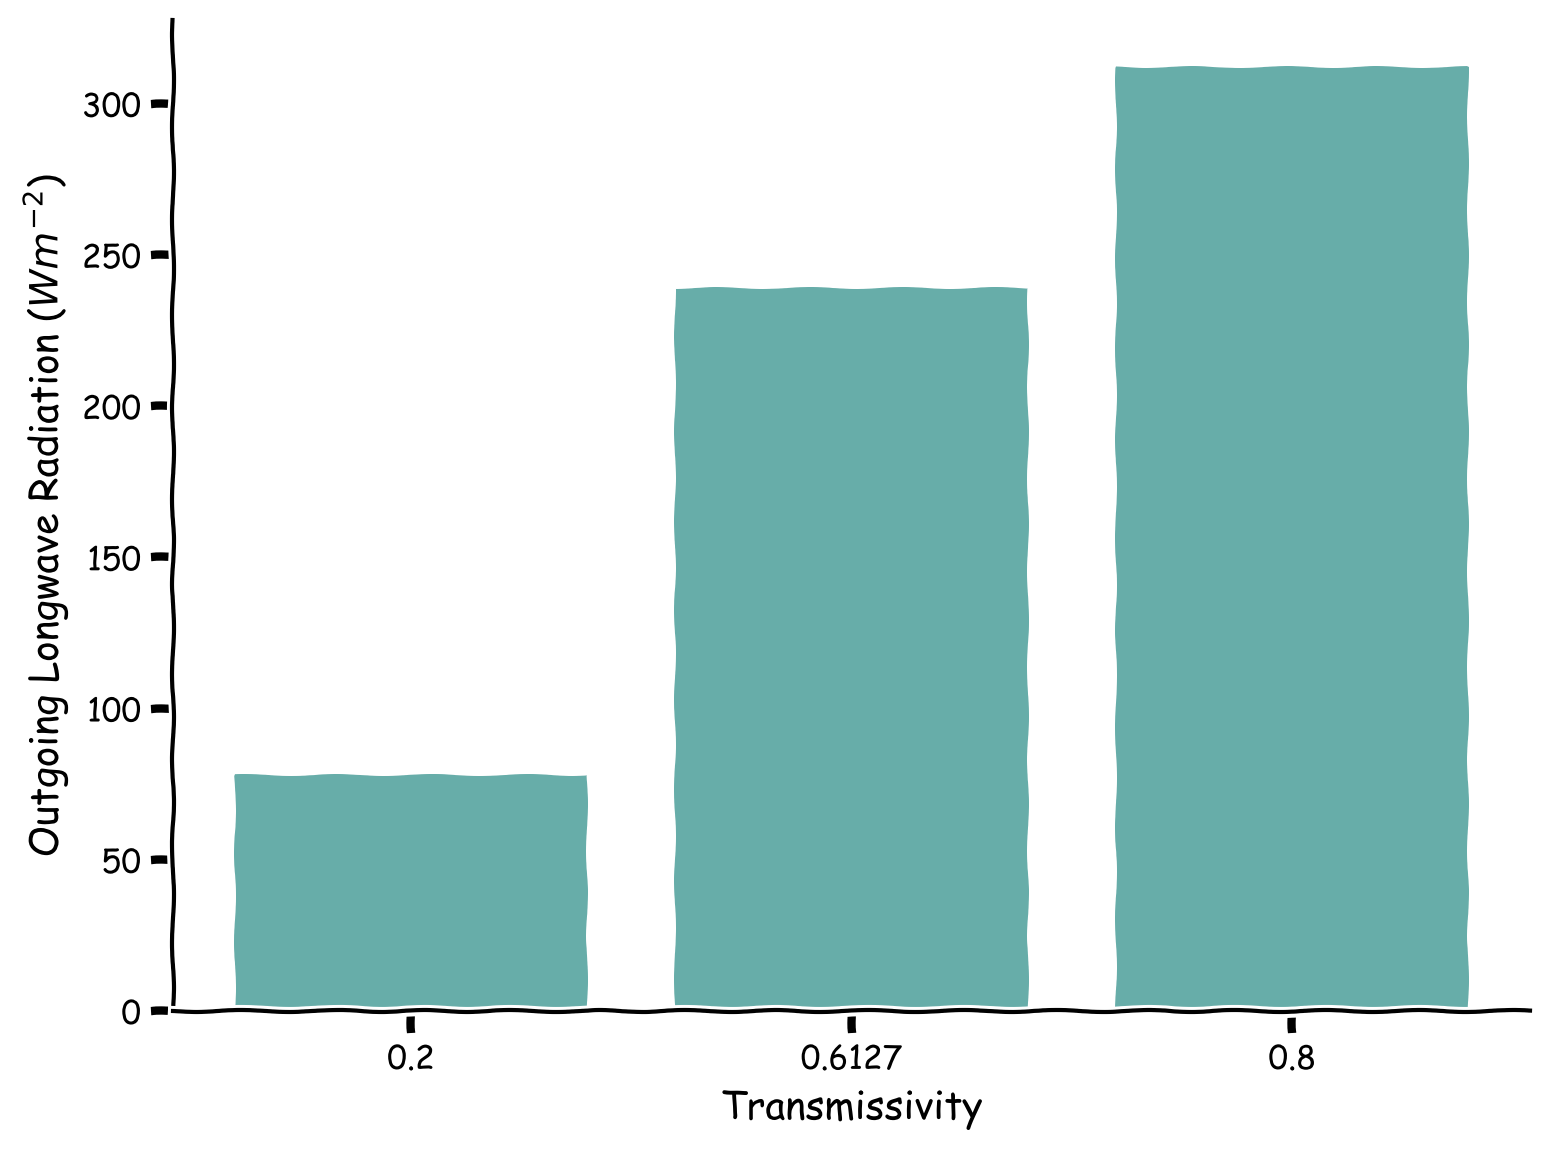

In [14]:
# to_remove solution

# define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
sigma = 5.67e-8 # W m^-2 K^-4

# define the emission temperature based on observtions of global mean surface temperature
T = 288 # K

# define values of tau
tau = [0.2,0.6127,0.8]

# get values of OLR from tau using list comprehension
OLR = [t*sigma*(T**4) for t in tau]

# convert tau to list of strings using list comprehension so we can create a categorical plot
tau = [str(t) for t in tau]

with plt.xkcd(): # ohad comment: this is really not necesarry, just plot regularily. it cause a lot of warnings. 
  plt.bar(tau,OLR, color= '#67ada9')
  plt.xlabel('Transmissivity')
  plt.ylabel('Outgoing Longwave Radiation ($W m^{-2}$)')

# **Bonus: Blackbody Radiation Coding Exercise**

By defining a function for Planck's Law, plot the blackbody radiation curve for the sun, assuming an emission temperature of 5800K. Underlay an approximation of the visible range from the electromagnetic spectrum. This exercise should help you understand why we see in color as well as why the sun's radiation headed towards Earth is called incoming shortwave radiation.

In [15]:
#################################################
# Students: Fill in missing code (...) and comment or remove the next line
raise NotImplementedError("Student exercise: By defining a function for Planck's Law, plot the blackbody radiation curve for the sun, assuming an emission temperature of 5800K.")

# define the emission temperature of the sun
...


# define constants used in Planck's Law
h = 6.626075e-34    # J s
c = 2.99792e+8      # m s^-1
k = 1.3804e-23      # W K^-1
 
# define the function for Planck's Law that returns the intensity as well 
# as the peak wavelength defined by Wien's Law
def planck(wavelength, temperature):
  ...
  return intensity,lpeak

# generate x-axis in increments from 1um to 100 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-7, 4e-6, 1e-9) 

# intensity and peak radiating wavelength at different temperatures
...

# get the intensity at peak wavelength to limit the lines
...

# plot an approximation of the visible range by defining a dictionary with 
# wavelength ranges and colors
rainbow_dict= { (.4, .44): '#8b00ff', (.44, .46): '#4b0082',
                (.46, .5): '#0000ff', (.5, .57): '#00ff00',
                (.57, .59): '#ffff00', (.59, .62): '#ff7f00',
                (.62, .75): '#ff0000'}
for wv_range, rgb in rainbow_dict.items():
    plt.axvspan(*wv_range, color=rgb,ec = 'none')

# add in wiens law
plt.vlines(...)

# plot intensity curve
plt.plot(...) 

plt.xlabel('Wavelength ($\mu m$)',fontsize = 20)
plt.ylabel('$B_\lambda(\lambda,T)$ $(W/(m^3 steradian)$',fontsize = 20)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.title ('Spectral Radiance')

# add legend
plt.legend(bbox_to_anchor=(.5, .5))

NotImplementedError: Student exercise: By defining a function for Planck's Law, plot the blackbody radiation curve for the sun, assuming an emission temperature of 5800K.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

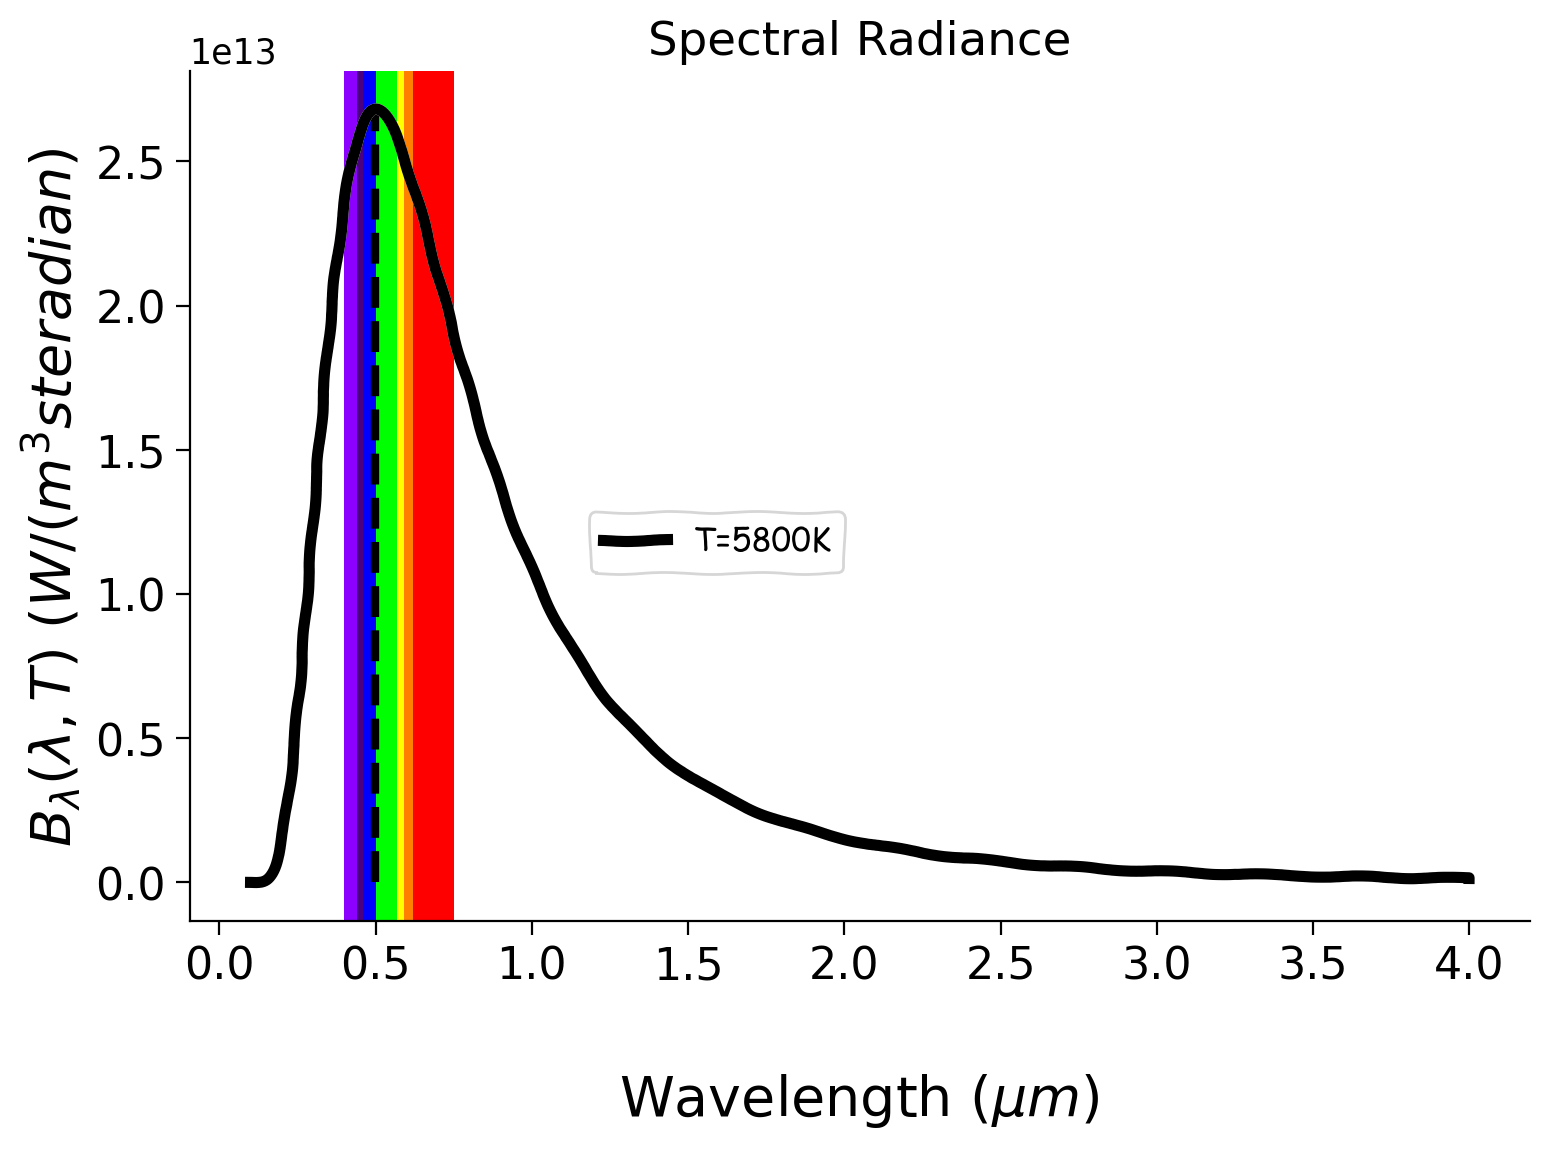

In [16]:
# to_remove solution

# define the emission temperature of the sun
T_sun = 5800  # K

# define constants used in Planck's Law
h = 6.626e-34
c = 3.0e+8
k = 1.3804e-23

# define the function for Planck's Law that returns the intensity as well 
# as the peak wavelength defined by Wien's Law
def planck(wavelength, temperature):
    a = 2.0*h*c**2
    b = h*c/(wavelength*k*temperature)
    intensity = a/ ( (wavelength**5) * (np.exp(b) - 1.0) )

    lpeak = (2.898 * 1e-3)/temperature

    return intensity,lpeak

# generate x-axis in increments from 1um to 100 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-7, 4e-6, 1e-9) 

# intensity and peak radiating wavelength at different temperatures
intensity,lpeak = planck(wavelengths, T_sun)

# get the intensity at peak wavelength to limit the lines
Ipeak,_ = planck(lpeak,T_sun)


# plot an approximation of the visible range by defining a dictionary with 
# wavelength ranges and colors
rainbow_dict= { (.4, .44): '#8b00ff', (.44, .46): '#4b0082',
                (.46, .5): '#0000ff', (.5, .57): '#00ff00',
                (.57, .59): '#ffff00', (.59, .62): '#ff7f00',
                (.62, .75): '#ff0000'}
for wv_range, rgb in rainbow_dict.items():
    plt.axvspan(*wv_range, color=rgb,ec = 'none')

with plt.xkcd(): # note using xkcd for the visible range plot made it hard to discern so it is plotted normally.
  # add in wiens law
  plt.vlines(x=lpeak*1e6,ymin = 0,ymax = Ipeak,color= 'k', ls = '--', lw = 3)


  # plot intensity curve
  plt.plot(wavelengths*1e6, intensity, lw = 4, label = 'T=' + str(T_sun) + 'K', color= 'k') 


  plt.xlabel('Wavelength ($\mu m$)',fontsize = 20, labelpad = 30)
  plt.ylabel('$B_\lambda(\lambda,T)$ $(W/(m^3 steradian)$',fontsize = 20)

  plt.xticks(fontsize = 16)
  plt.yticks(fontsize = 16)

  plt.title ('Spectral Radiance')

  # add legend
  plt.legend(bbox_to_anchor=(.5, .5))